In [1]:
import numpy as np
import fluprodia as fp
import matplotlib.pyplot as plt

In [2]:
diagram = fp.FluidPropertyDiagram(fluid='H2O')
diagram.set_unit_system(T='°C', h='kJ/kg', p='bar')

Q = np.linspace(0, 1, 11)
T = np.arange(25, 501, 25)
p = np.geomspace(0.01, 1000, 6) * 1e5
v = np.geomspace(0.001, 10, 5)
s = np.linspace(1000, 10000, 10)
h = np.linspace(0, 3600, 19)

diagram.set_isolines(Q=Q, T=T, p=p, v=v, s=s, h=h)

diagram.calc_isolines()


In [10]:
v

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

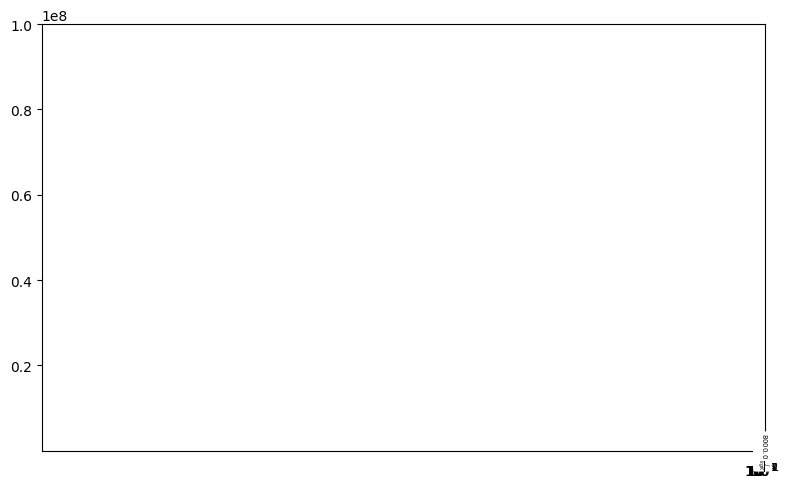

In [9]:
fig, ax = plt.subplots(1, figsize=(8, 5))

diagram.draw_isolines(diagram_type='plogv', fig=fig, ax=ax,
                      x_min=0, x_max=10, y_min=0.01e5, y_max=1000e5)

plt.tight_layout()

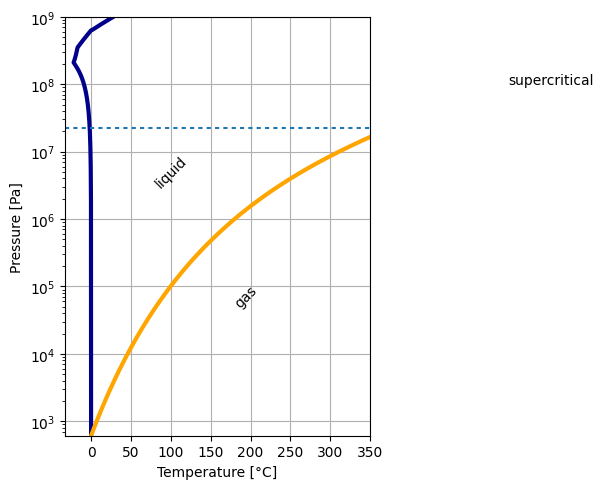

In [15]:
import matplotlib
import numpy as np
import CoolProp as CP
import matplotlib.pyplot as plt
import scipy.interpolate

Water = CP.AbstractState("HEOS", "Water")
pc = Water.keyed_output(CP.iP_critical)
Tc = Water.keyed_output(CP.iT_critical)
Tmin = 200
Tmax = 1000
pmax = Water.keyed_output(CP.iP_max)
pt = 611.657
Tt = 273.16
fillcolor = 'g'

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
lw = 3

# --------------
# Melting curve
# --------------
melt_args = dict(lw = lw, solid_capstyle = 'round')
TT = []
PP = list(np.logspace(np.log10(pt), np.log10(pmax),1000))
for p in PP:
    TT.append(Water.melting_line(CP.iT, CP.iP, p))

#Zone VI
for T in np.linspace(max(TT), 355):
    TT.append(T)
    theta = T/273.31
    pi = 1-1.07476*(1-theta**4.6)
    p = pi*632.4e6
    PP.append(p)

plt.plot(np.array(TT)-273.15,PP,'darkblue',**melt_args)

# ----------------
# Saturation curve
# ----------------
Ts = np.linspace(273.16, Tc, 1000)
ps = CP.CoolProp.PropsSI('P','T',Ts,'Q',0,'Water')

# ------
# Labels
# ------

plt.plot(Ts-273.15,ps,'orange',lw = lw, solid_capstyle = 'round')

# Critical lines
plt.axvline(Tc-273.15, dashes = [2, 2])
plt.axhline(pc, dashes = [2, 2])

# Labels
plt.text(850-273.15, 1e8, 'supercritical',ha= 'center')
# plt.text(850-273.15, 1e5, 'supercritical_gas', rotation = 90)
# plt.text(450-273.15, 1e8, 'supercritical_liquid', rotation = 0, ha = 'center')
plt.text(350-273.15, 3e6, 'liquid', rotation = 45)
plt.text(450-273.15, 5e4, 'gas', rotation = 45)

plt.ylim(611,1e9)
plt.gca().set_yscale('log')
plt.gca().set_xlim(240-273.15, 400-273.15)
plt.ylabel(u'Pressure [Pa]')
plt.xlabel(u'Temperature [°C]')
plt.xticks(np.arange(0.,400.,50.))
plt.tight_layout()
plt.grid()
plt.show()
